# FMC Output to Pandas CSV

The intention of this notebook is to better understand the numpy data structure and how to integrate it into a human readable csv via pandas. The pandas df can then be converted to a .trc format relatively easily

*Numpy data file structure*: https://github.com/freemocap/freemocap/wiki

*Discord link where Jon Matthis brings this up*: https://discord.com/channels/760487252379041812/760489542888194138/978974531207172127



In [1]:
import numpy as np
fmc_output_path = "C:/Users/Mac Prible/FreeMocap_Data/sesh_2022-08-10_10_33_12/DataArrays/mediaPipeSkel_3d.npy"
fmc_output = np.load(fmc_output_path)


In [2]:
# This code copied from https://github.com/freemocap/freemocap/wiki


import numpy as np
from pathlib import Path 
import matplotlib.pyplot as plt

sessionPath = Path("C:/Users/Mac Prible/FreeMocap_Data/sesh_2022-08-10_10_33_12") #replace this with path to the unzipped session data folder, e.g. Path(r'C:/Users/Me/session_data_folder')
dataArrayPath = sessionPath / 'DataArrays'
skeletonPath = dataArrayPath / 'mediaPipeSkel_3d.npy'

print(skeletonPath)

skel_fr_mar_dim = np.load(skeletonPath) #load 3d open pose data

#openPoseData_nCams_nFrames_nImgPts_XYC = np.load(dataArrayPath / 'openPoseData_2d.npy') #2d data too, if you're into that




C:\Users\Mac Prible\FreeMocap_Data\sesh_2022-08-10_10_33_12\DataArrays\mediaPipeSkel_3d.npy


Fun little side project that is kinda relevant here. I'm going to create something that will build a list of all possible combinations of axis-dim# pairs. This will be used to iterate across possibilities in order to identify the one that  best displays the data

x:0
y:1
z:2


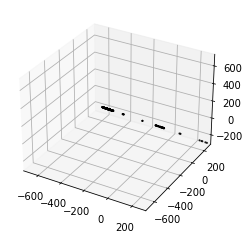

x:0
y:2
z:1


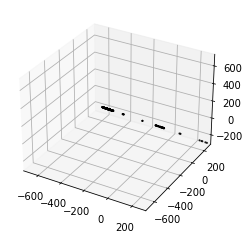

x:1
y:0
z:2


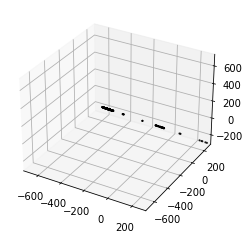

x:1
y:2
z:0


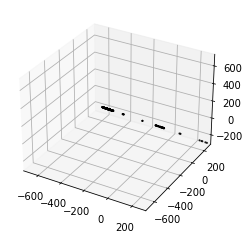

x:2
y:0
z:1


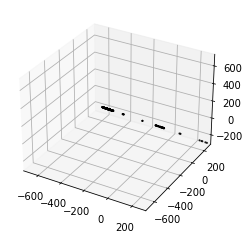

x:2
y:1
z:0


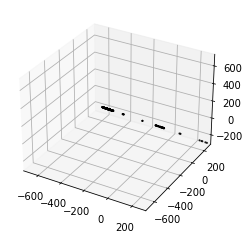

In [9]:

frameNum = 300 #just pulling out the data from frame 200 here

# Check each possible axis to dimension combination to determine which is best to match

# Build list of lists that can be used to iterate
def PlotFrame(frameNum = 200, Axes= [0,2,1] , FlipAxis=[1,1,-1]):

    # These are the order of the axes as stored in the 
    
    x_axis = Axes[0]
    y_axis = Axes[1]
    z_axis = Axes[2]

    # if this is negative, then it will flip the axis
    
    flip_x = FlipAxis[0]
    flip_y = FlipAxis[1]
    flip_z = FlipAxis[2]

    sk_x = skel_fr_mar_dim[frameNum, :, x_axis] * flip_x  # skeleton x data
    sk_y = skel_fr_mar_dim[frameNum, :, y_axis] * flip_y  # skeleton y data
    sk_z = skel_fr_mar_dim[frameNum, :, z_axis] * flip_z  # skeleton z data

    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter3D(sk_x, sk_y, sk_z, marker=".", color="k", s=4.0)


    mx = np.nanmean(sk_x)
    my = np.nanmean(sk_y)
    mz = np.nanmean(sk_z)

    axRange = 500

    ax.set_xlim(mx - axRange, mx + axRange)
    ax.set_ylim(my - axRange, my + axRange)
    ax.set_zlim(mz - axRange, mz + axRange)
    plt.show()
    #You did it!

import itertools

for combo in itertools.permutations([0,1,2]):
    print("x:" + str(combo[0]))
    print("y:" + str(combo[1]))
    print("z:" + str(combo[2]))
    PlotFrame(combo, [1,1,1])

Alright, I believe that the appropriate listing is: x:0 ; y:2; z:1.

However, it also seems that the axis should be adjusted to have the feet a the bottom, so test out an adjustment of the axis in the z dimension.

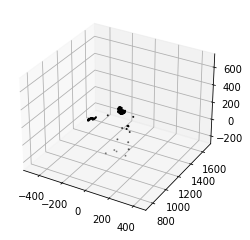

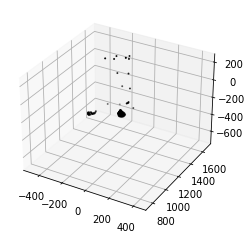

In [8]:
PlotFrame()


So it appears that flipping the "x" parameter here will result in the frame appearing upright when printed. With this sorted out, it may be easier to begin to get the numpy file in a human readable format (perhaps easier to gut check things)

In [7]:
fmc_output.shape
print(fmc_output)

[[[          nan           nan           nan]
  [          nan           nan           nan]
  [          nan           nan           nan]
  ...
  [          nan           nan           nan]
  [          nan           nan           nan]
  [          nan           nan           nan]]

 [[ -28.53862038 -256.35444136 1358.64336946]
  [          nan           nan           nan]
  [ -16.93765892 -267.83267216 1349.7161614 ]
  ...
  [          nan           nan           nan]
  [          nan           nan           nan]
  [          nan           nan           nan]]

 [[  -4.18043986 -253.84137281 1352.38448742]
  [   4.03936118 -265.68236677 1347.25980158]
  [   6.84336519 -265.09520292 1343.17839652]
  ...
  [  55.25241957 -276.56521159 1382.55272656]
  [  68.55037443 -278.29630735 1373.28852124]
  [  69.97645837 -279.40432143 1372.31249746]]

 ...

 [[          nan           nan           nan]
  [          nan           nan           nan]
  [          nan           nan           nan]
  ..